In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
# generate random data
np.random.seed(24)
x = np.random.uniform(-5,5,25)
ϵ = 2*np.random.randn(25)
y = 2*x+ϵ

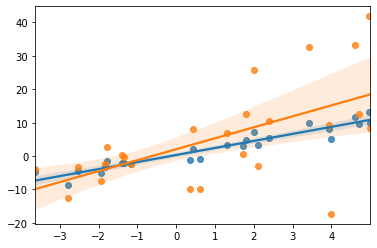

In [2]:
# alternate error as a function of x
ϵ2 = ϵ*(x+5)
y2 = 2*x+ϵ2
sns.regplot(x,y);
sns.regplot(x,y2);

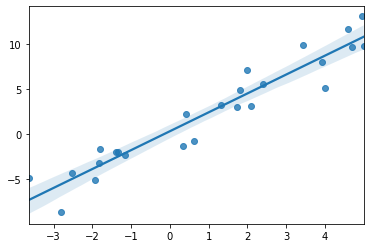

In [3]:
sns.regplot(x,y)

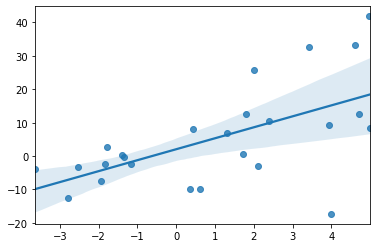

In [4]:
sns.regplot(x,y2)

In [5]:
# add a strong outlier for high x
x_high = np.append(x,5)
y_high = np.append(y2,160)
# add a strong outlier for low x
x_low = np.append(x,-4)
y_low = np.append(y2,160)

In [6]:
# calculate weights for sets with low and high outlier
sample_weights_low = [1/(x+5) for x in x_low]
sample_weights_high = [1/(x+5) for x in x_high]

In [7]:
ymod = y_low
# reshape for compatibility
X_low = x_low.reshape(-1, 1)
X_high = x_high.reshape(-1, 1)

# import and fit an OLS model, check coefficients
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_low, ymod)
# fit WLS using sample_weights
WLS = LinearRegression()
WLS.fit(X_low, ymod, sample_weight=sample_weights_low)
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)
# run this yourself, don't trust every result you see online =)

11.928279162202099 [-0.80996264]
WLS
17.49178858287187 [-7.72446701]


In [8]:
model = LinearRegression()
model.fit(X_high, ymod)
WLS.fit(X_high, ymod, sample_weight=sample_weights_high)
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)

4.240948049524315 [6.1138495]
WLS
5.673823120611782 [4.86870293]


In [9]:
ymod = y_high
# reshape for compatibility
X_low = x_low.reshape(-1, 1)
X_high = x_high.reshape(-1, 1)

# import and fit an OLS model, check coefficients
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_low, ymod)
# fit WLS using sample_weights
WLS = LinearRegression()
WLS.fit(X_low, ymod, sample_weight=sample_weights_high)
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)
# run this yourself, don't trust every result you see online =)

11.928279162202099 [-0.80996264]
WLS
4.576946530053446 [1.3992472]


In [10]:
model = LinearRegression()
model.fit(X_high, ymod)
WLS.fit(X_high, ymod, sample_weight=sample_weights_high)
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)

4.240948049524315 [6.1138495]
WLS
5.673823120611782 [4.86870293]
